# K-최근접 이웃 (K-Nearest Neighbors, K-NN)
- Baseline 모델(평가지표 기준으로 더 잘나와야 된다는 목적)
- 복잡한 모델 사용하기 전에 Dataset 성능 테스트해볼 때 사용
- [최종적 결과 내기 위한 모델 아님
- 분류(Classification)와 회귀(Regression) 모두 지원
- 예측하려는 데이터와 input 데이터들 간의 거리를 측정해 가장 가까운 K개의 데이터셋의 레이블을 참조해 분류/예측
- 과적합? 모델 복잡하면 발생
    - K 값이 작을수록 복잡한 모델. 이상치에 민감
- 학습시 단순히 input 데이터들을 저장만 하며 예측 시점에 거리를 계산
    - 학습은 빠르지만 예측시 시간이 많이 걸림
        - 예측할 때, 거리를 계산

## 분류

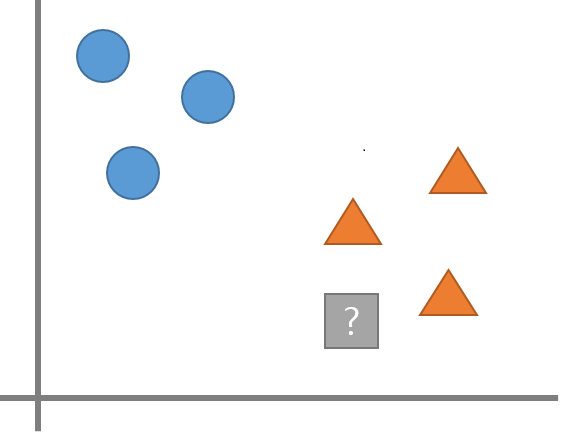

- K-NN에서 **K**는 새로운 데이터포인트 분류할때 확인할 데이터 포인트의 개수를 지정하는 **하이퍼파라미터**

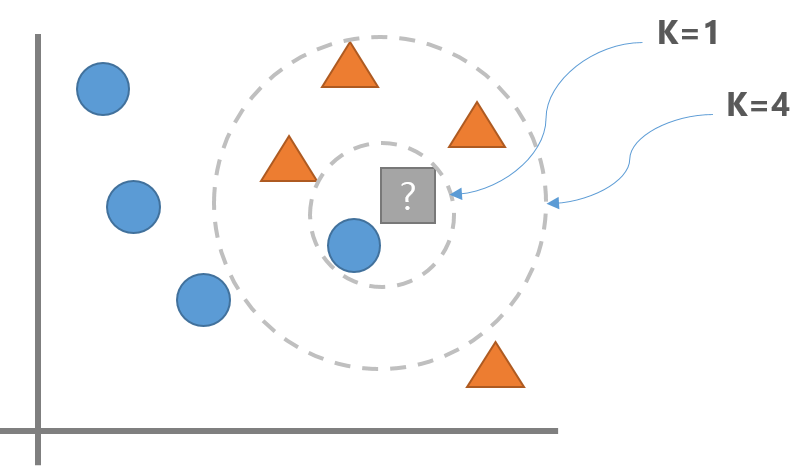

- K를 1로 하면 <font color='blue'>파란색</font>, K를 3으로 하면 <font color='blue'>주황색</font> 으로 분류
- K가 너무 작으면 과적합(Overfitting)이 일어나고 K가 너무 크면 성능이 나빠짐(Underfitting). 

## 주요 하이퍼 파라미터
- 이웃 수 
    - n_neighbors = K
    - **K가 작을수록 모델이 복잡해져 과적합이 일어나고 너무 크면 단순해져 성능이 나빠짐**
    - n_neighbors는 Feature수의 제곱근 정도를 지정할 때 성능이 좋은 것으로 알려져 있다.
- 거리 재는 방법 
    - p=2: 유클리디안 거리(Euclidean distance - 기본값)
    - p=1: 맨하탄 거리(Manhattan distance)
    

> ### 유클리디안 거리(Euclidean_distance, L2 norm)
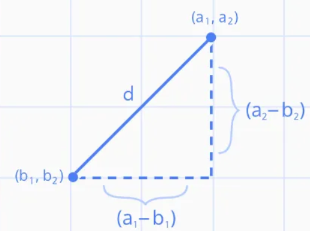

$$
distance = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2}\\
n차원 벡터간의 거리 = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2 +...+(a_n-b_n)^2}
$$

> ### 맨하탄 거리 (Manhattan distance, L1 norm)
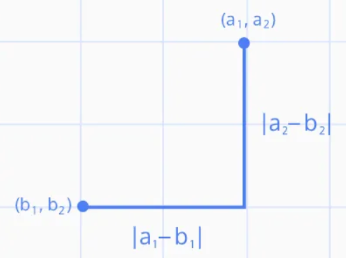

$$
distance = |a_1 - b_1| + |a_2 - b_2| \\
𝑛차원벡터간의거리= |a_1 - b_1| + |a_2 - b_2| + ... + |a_n - b_n|
$$

## 요약
- K-NN은 이해하기 쉬운 모델이며 튜닝할 하이퍼파라미터의 수가 적어 빠르게 만들 수 있음
- K-NN은 서비스할 모델 구현할때 보다 **복잡한 알고리즘 적용 전 확인용 or base line 잡기 위한 모델로 사용**
    - 추론할 때 시간 많이 소요됨. 고객한테 서비스할 때 느림
- 훈련세트가 너무 큰 경우(Feature나 관측치 개수 많은 경우) 거리 계산하는 양이 늘어나 예측 느려짐
    - 예측할 때마다 모든 개체와의 거리수를 계산함
- Feature간 값의 단위가 다르면 작은 단위의 Feature에 영향 많이 받게 되므로 **전처리로 Scaling작업** 필요
- Feature가 너무 많은 경우와 대부분의 값이 0으로 구성된(희소-sparse) 데이터셋에서 성능이 아주 나쁨

## 위스콘신 유방암 데이터를 이용한 암환자분류
### K값 변화에 따른 성능 평가
- malignant: 악성
- benign : 양성

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [7]:
# 전처리 작업
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# 반복문
k_list = range(1, 21)
train_acc_list = []
test_acc_list = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    
    pred_train = knn.predict(X_train_scaled)
    pred_test = knn.predict(X_test_scaled)
    
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [10]:
# Train은 전체적으로 떨어지고 있고, Test는 유지하는 형태
pd.DataFrame(dict(K = k_list, 
                  Train = train_acc_list,
                  Test = test_acc_list))

,K,Train,Test
0,1,1.000000,0.965035
1,2,0.981221,0.958042
2,3,0.981221,0.965035
3,4,0.985915,0.972028
4,5,0.981221,0.965035
5,6,0.981221,0.972028
6,7,0.974178,0.965035
7,8,0.974178,0.972028
8,9,0.974178,0.965035
9,10,0.974178,0.965035


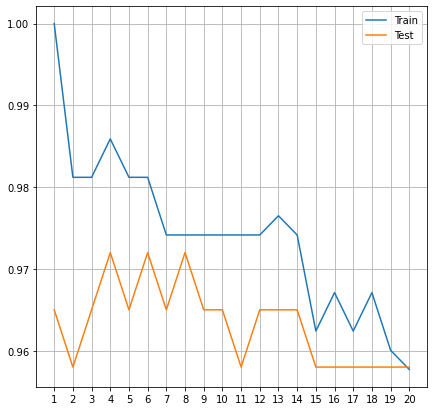

In [16]:
# k = 4일 때가 가장 적합
# k 값이 작을수록 복잡한 모델. k 값이 커질수록 단순한 모델
plt.figure(figsize = (7,7))
plt.plot(k_list, train_acc_list, label="Train")
plt.plot(k_list, test_acc_list, label="Test")
plt.xticks(ticks=k_list)
plt.legend()
plt.grid(True)
plt.show()

## Todo: iris dataset 분류

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 1)

In [22]:
# 1. Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
#2. Model 학습 - GridSearchCV
param = {"n_neighbors": range(1, 20)}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn,
                  param_grid = param,
                  scoring = 'accuracy',
                  cv = 3,
                  n_jobs = -1)
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy')

In [26]:
gs.best_params_

{'n_neighbors': 5}

In [28]:
import pandas as pd
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,0.002660,9.413358e-04,0.012967,0.011283,5,{'n_neighbors': 5},0.947368,0.945946,0.972973,0.955429,0.012419,1
5,0.001663,4.687854e-04,0.006317,0.000470,6,{'n_neighbors': 6},0.947368,0.945946,0.972973,0.955429,0.012419,1
10,0.001329,4.679996e-04,0.011635,0.005891,11,{'n_neighbors': 11},0.894737,0.945946,1.000000,0.946894,0.042979,3
12,0.003322,2.617808e-03,0.005319,0.000470,13,{'n_neighbors': 13},0.894737,0.972973,0.972973,0.946894,0.036881,3
2,0.003325,2.049383e-03,0.007647,0.001245,3,{'n_neighbors': 3},0.921053,0.918919,1.000000,0.946657,0.037729,5
6,0.000998,1.266589e-06,0.015957,0.014128,7,{'n_neighbors': 7},0.921053,0.945946,0.972973,0.946657,0.021202,5
7,0.001995,2.973602e-07,0.005651,0.000939,8,{'n_neighbors': 8},0.921053,0.945946,0.972973,0.946657,0.021202,5
3,0.003655,1.242754e-03,0.006650,0.002351,4,{'n_neighbors': 4},0.947368,0.918919,0.972973,0.946420,0.022078,8
9,0.007648,8.033726e-03,0.009308,0.003083,10,{'n_neighbors': 10},0.894737,0.945946,0.972973,0.937885,0.032444,9
8,0.001331,4.702465e-04,0.005982,0.000814,9,{'n_neighbors': 9},0.894737,0.945946,0.972973,0.937885,0.032444,9


In [29]:
b_model = gs.best_estimator_
print(b_model)

KNeighborsClassifier()


In [30]:
pred_train = gs.predict(X_train_scaled)
pred_test = gs.predict(X_test_scaled)

In [31]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9642857142857143, 0.9736842105263158)

## Todo: pipeline 이용

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ('knn', KNeighborsClassifier())
])
gs2 = GridSearchCV(pipeline,
                   param_grid={'knn__n_neighbors':range(1, 20)},
                   scoring = 'accuracy',
                   cv = 3,
                   n_jobs = -1)

In [34]:
gs2.fit(X_train, y_train)
pred_train2 = gs2.predict(X_train)
pred_test2 = gs2.predict(X_test)

In [35]:
accuracy_score(y_train, pred_train2), accuracy_score(y_test, pred_test2)

(0.9642857142857143, 0.9736842105263158)

In [36]:
gs2.best_params_

{'knn__n_neighbors': 5}